1. Preprocess the customer data. How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [7]:
import numpy as np
import pandas as pd
customer_df=pd.read_csv("marketing_campaign.csv", sep='\t')
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [42]:
from sklearn.preprocessing import StandardScaler
customer_df.fillna(customer_df.median(numeric_only=True), inplace=True)
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'], dayfirst=True)

customer_df = pd.get_dummies(customer_df, drop_first=True)

scaler = StandardScaler()
num = customer_df.select_dtypes(include=['float64','int64']).columns
customer_df[num] = scaler.fit_transform(customer_df[num])

customer_df.head()


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.020999,-0.985345,0.235696,-0.825218,-0.929894,2012-09-04,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846,False,True,False,False,False,False,False,True,False,False,False
1,-1.053058,-1.235733,-0.235454,1.032559,0.906934,2014-03-08,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,False,True,False,False,False,False,False,True,False,False,False
2,-0.447070,-0.317643,0.773999,-0.825218,-0.929894,2013-08-21,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,False,True,False,False,False,False,False,False,True,False,False
3,0.181716,1.268149,-1.022355,1.032559,-0.929894,2014-02-10,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,False,True,False,False,False,False,False,False,True,False,False
4,-0.082614,1.017761,0.241888,1.032559,-0.929894,2014-01-19,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612,False,False,False,True,False,False,True,False,False,False,False


2. Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

- No you shouldnt look at all the data since not all of it is related to the data we are exactly looking at such as the customer segments. The ideal number for clusters, i used the elbow method and it happened to be around 3-4 since the bend at the model is around at that. I used the elbow method because its a good visual to see what he ideal number of clusters is becasue you can see the bend on the model and that will be the ideal number. 

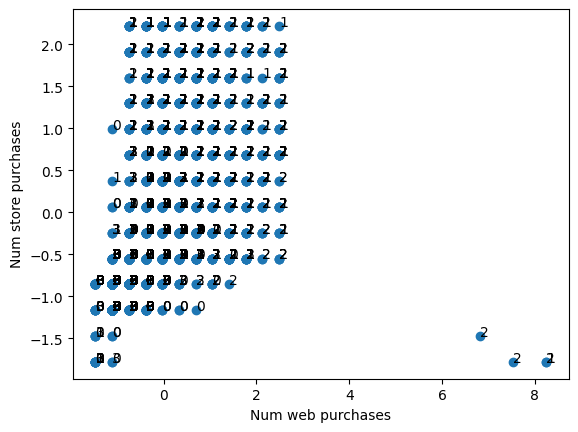

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

segments = customer_df[['MntWines', 'MntFruits','MntMeatProducts',
                       'MntFishProducts','MntSweetProducts','MntGoldProds',
                       'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
                       'NumStorePurchases','NumWebVisitsMonth','Income','Recency']]
kmeans = KMeans(n_clusters=4, random_state=42) 
customer_df['Cluster'] = kmeans.fit_predict(segments)

plt.scatter(segments['NumWebPurchases'], segments['NumStorePurchases'])
for i, txt in enumerate(customer_df['Cluster']):
    plt.annotate(txt, (segments['NumWebPurchases'][i],segments['NumStorePurchases'][i]))

plt.xlabel('Num web purchases')
plt.ylabel('Num store purchases')
plt.show()   

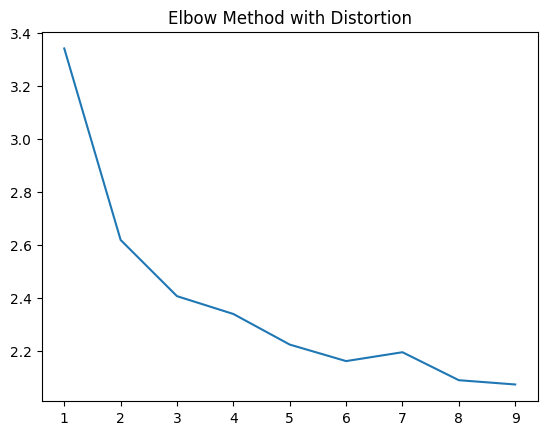

In [55]:
inertias = []
distortions = []

for k in range(1,10):
    model = KMeans(n_clusters=k).fit(segments)

    distance = cdist(segments, model.cluster_centers_,
                     'euclidean')
    distortion = sum(np.min(distance, axis=1))/segments.shape[0]
    distortions.append(distortion)

    inertia = model.inertia_
    inertias.append(inertia)

plt.plot(range(1,10), distortions)    
plt.title('Elbow Method with Distortion')
plt.show()

3. Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?
- I used the dendogram to find the ideal number of clusters because you can tell by the vertical distances of the model and the cuttoff made by a horizontla line that you can run. The ideal number of cluster would be 3 in this case. 

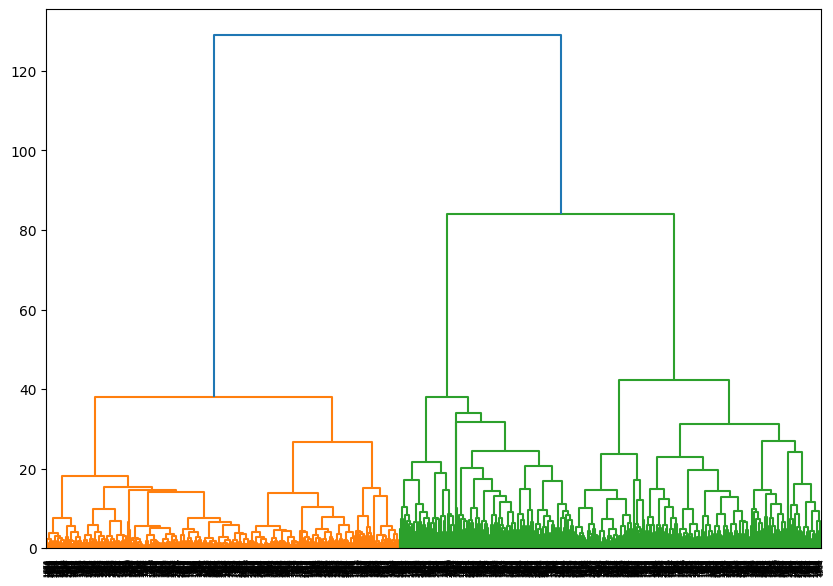

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(segments, 'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels = customer_df.index.tolist())

In [77]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
cluster.fit_predict(segments)

array([2, 1, 0, ..., 0, 0, 1])

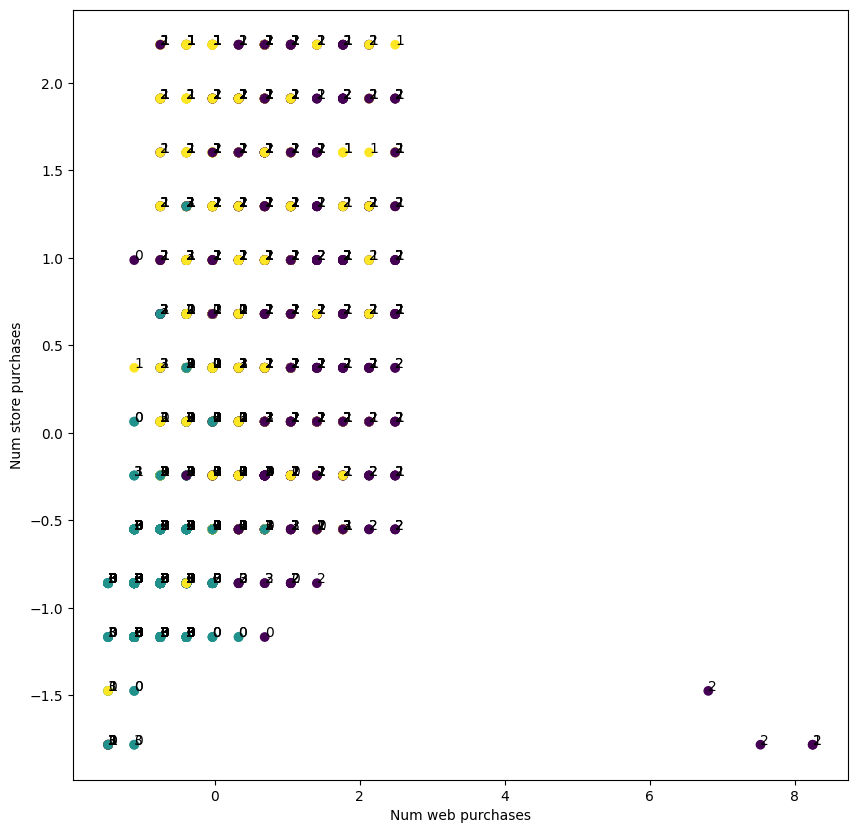

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(segments['NumWebPurchases'], segments['NumStorePurchases'],c=cluster.labels_)
for i, txt in enumerate(customer_df['Cluster']):
    plt.annotate(txt, (segments['NumWebPurchases'][i],segments['NumStorePurchases'][i]))

plt.xlabel('Num web purchases')
plt.ylabel('Num store purchases')
plt.show()   

4. Compare the results of 2 and 3. Which approach do you think is best? Why?

I think that Kmeans would be the better approach for this 
because this dataset is larger and kmeans works better with larger datasets also running the code 
it was faster than the hierarchical. Also visuallsing in my opinion is better becasue you can tell where the bend is
and in the hierarchical you can tell but it can be hard to tell wether its correct or not
because of the cutoff.